<a href="https://colab.research.google.com/github/emmelinetsen/deep_learning/blob/master/assignment_3/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a) Implement (i) keras based models for classifying using CNN planet amazon data set 

 

See https://colab.research.google.com/github/fastai/course-v3/blob/master/nbs/dl1/lesson3-planet.ipynb?authuser=1#scrollTo=-XOcH94uQjPM (Links to an external site.) (this implements pytorch) - I want keras model !! not pytorch - students will get zero points if they submit pytorch one) for more information.

Try out various hyper parameters. provide detailed comments in colab with various experiments. 

Please implement from scratch and not copy

50% points will be to provide tensorboard integration and trying out various layers/activation functions/other hyperparams like optimizers - Please submit the tensorboard result to tensorboard.dev

# Getting the Data

In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# download kaggle dataset https://www.kaggle.com/general/74235
# installing kaggle API
! pip install -q --upgrade kaggle 

from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
# ! kaggle competitions download -c 'planet-understanding-the-amazon-from-space'

# downloading dataset from https://www.kaggle.com/nikitarom/planets-dataset
! kaggle datasets download nikitarom/planets-dataset


Saving kaggle.json to kaggle.json
ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)    2GB  2020-05-01 22:56:29          59933  
divyansh22/us-border-crossing-data                          US Border Crossing Data                               2MB  2020-04-19 09:38:10            530  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                          142MB  2020-04-29 22:47:23           6286  
baltacifatih/turkish-lira-banknote-dataset                  Turkish Lira Banknote Dataset                         3GB  2020-04-19 14:48:39             65  
doaaalsenani/usa-cers-dataset 

In [4]:
!unzip planets-dataset.zip
# ! ls Planet

Streaming output truncated to the last 5000 lines.
  inflating: test-jpg-additional/test-jpg-additional/file_55.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_550.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5500.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5501.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5502.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5503.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5504.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5505.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5506.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5507.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5508.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_5509.jpg  
  inflating: test-jpg-additional/test-jpg-additional/file_551.jpg  
  inflating: test-jpg-additional/test-jpg-additional/fil

# Multiclassification

In [5]:
import pandas as pd

folder = "planet/planet/"
df = pd.read_csv(folder + 'train_classes.csv')
df.head()

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road


In [6]:
import cv2
import tqdm

# creating a mapping for the labels
flatten = lambda l: [item for sublist in l for item in sublist]
tags = list(set(flatten([l.split(' ') for l in df['tags'].values])))
labels = {l: i for i, l in enumerate(tags)}
print(labels)


{'haze': 0, 'cultivation': 1, 'clear': 2, 'artisinal_mine': 3, 'conventional_mine': 4, 'bare_ground': 5, 'habitation': 6, 'agriculture': 7, 'water': 8, 'road': 9, 'slash_burn': 10, 'partly_cloudy': 11, 'primary': 12, 'blooming': 13, 'selective_logging': 14, 'blow_down': 15, 'cloudy': 16}


In [7]:
import numpy as np

X_train = []
X_test = []
y_train = []

for name, tags in tqdm.tqdm(df.values, miniters=100):
    
    image = cv2.imread(folder + "train-jpg/" + name + ".jpg")
    targets = np.zeros(17)
    for tag in tags.split(' '):
        targets[labels[tag]] = 1
    #print(image)
    X_train.append(cv2.resize(image, (64, 64)))
    y_train.append(targets)

X_train = np.array(X_train, np.float16) / 255
y_train = np.array(y_train, np.uint8)

100%|██████████| 40479/40479 [00:50<00:00, 804.78it/s]


In [8]:
X_train[0].shape

(64, 64, 3)

In [9]:
X_train[0]

array([[[0.396 , 0.4275, 0.3608],
        [0.4236, 0.447 , 0.4   ],
        [0.408 , 0.4353, 0.3804],
        ...,
        [0.4119, 0.4353, 0.3687],
        [0.4   , 0.4158, 0.341 ],
        [0.4038, 0.4275, 0.3726]],

       [[0.4119, 0.4236, 0.3687],
        [0.408 , 0.443 , 0.3765],
        [0.4197, 0.4392, 0.3765],
        ...,
        [0.4   , 0.4275, 0.3647],
        [0.4158, 0.447 , 0.3726],
        [0.396 , 0.4197, 0.341 ]],

       [[0.408 , 0.4236, 0.3647],
        [0.408 , 0.4236, 0.3687],
        [0.4158, 0.443 , 0.3843],
        ...,
        [0.396 , 0.4158, 0.3372],
        [0.4038, 0.4275, 0.3647],
        [0.3882, 0.4158, 0.3333]],

       ...,

       [[0.4119, 0.443 , 0.3765],
        [0.4119, 0.4314, 0.357 ],
        [0.4158, 0.4236, 0.3647],
        ...,
        [0.4   , 0.4314, 0.3608],
        [0.408 , 0.4314, 0.357 ],
        [0.4158, 0.4314, 0.353 ]],

       [[0.4158, 0.451 , 0.3804],
        [0.4119, 0.4392, 0.3608],
        [0.4197, 0.4353, 0.353 ],
        .

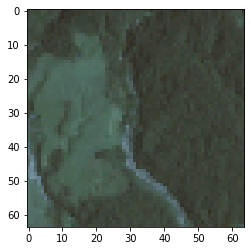

In [10]:
import matplotlib.pyplot as plt
img = np.array(X_train[1],dtype='float64')
plt.imshow(img)
plt.show()

In [11]:
y_train[1]

array([0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout,Flatten,Dense

def build_model():

    model = Sequential()
    # first convolutional layer
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(64, 64, 3)))
    model.add(MaxPooling2D())
    model.add(Dropout(0.5))

    # second convolutional layer
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D())
    model.add(Dropout(0.5))

    # flatten layer before fully connected layers
    model.add(Flatten())

    # fully connected layer
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.8))

    # final fully connected layer
    model.add(Dense(17, activation='sigmoid'))
    return model

model = build_model()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)            

In [14]:
# create tensorboard
import tensorflow as tf
import datetime
from keras.callbacks import EarlyStopping, TensorBoard


log_dir="logs/2conv-5epochs-adam-binary_crossentropy" 
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(x=X_train, 
          y=y_train, 
          epochs=5, 
          validation_data=(X_val, y_val), 
          callbacks=[tensorboard_callback])

Train on 30359 samples, validate on 10120 samples
Epoch 1/5
30359/30359 [==============================] - 19s 618us/step - loss: 0.2289 - accuracy: 0.9119 - val_loss: 0.2114 - val_accuracy: 0.9211
Epoch 2/5
30359/30359 [==============================] - 12s 412us/step - loss: 0.1999 - accuracy: 0.9213 - val_loss: 0.1877 - val_accuracy: 0.9292
Epoch 3/5
30359/30359 [==============================] - 13s 426us/step - loss: 0.1883 - accuracy: 0.9262 - val_loss: 0.1810 - val_accuracy: 0.9330
Epoch 4/5
30359/30359 [==============================] - 13s 416us/step - loss: 0.1797 - accuracy: 0.9298 - val_loss: 0.1773 - val_accuracy: 0.9301
Epoch 5/5
30359/30359 [==============================] - 13s 414us/step - loss: 0.1759 - accuracy: 0.9310 - val_loss: 0.1730 - val_accuracy: 0.9327


In [15]:
!tensorboard dev upload --logdir ./logs \
  --name "Understanding the Amazon from Space" \
  --description "Training results from https://colab.research.google.com/drive/1iNCPKX8iH4wI4rPKMaVXOWV02xJ2lfsQ?usp=sharing"

2020-05-02 05:04:10.049695: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1

***** TensorBoard Uploader *****

This will upload your TensorBoard logs to https://tensorboard.dev/ from
the following directory:

./logs

This TensorBoard will be visible to everyone. Do not upload sensitive
data.

Your use of this service is subject to Google's Terms of Service
<https://policies.google.com/terms> and Privacy Policy
<https://policies.google.com/privacy>, and TensorBoard.dev's Terms of Service
<https://tensorboard.dev/policy/terms/>.

This notice will not be shown again while you are logged into the uploader.
To log out, run `tensorboard dev auth revoke`.

Continue? (yes/NO) yes

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=373649185512-8v619h5kft38l4456nm2dj4ubeqsrvh6.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&sc